## Task 1

Analyzing the sensor model given in the assignment, it tells us that the robot's sensor is better at detecting a closed door since the error probability is quite small (0.2). In the case when the door is open, it has a probability of 0.4 which is quite high.

### Propagation Model

-  p(x<sub>t</sub> = 1 | u<sub>t</sub> = "push", x<sub>t-1</sub> = 1) = 1 
-  p(x<sub>t</sub> = 0 | u<sub>t</sub> = "push", x<sub>t-1</sub> = 1) = 0 
-  p(x<sub>t</sub> = 1 | u<sub>t</sub> = "push", x<sub>t-1</sub> = 0) = 0.8 
-  p(x<sub>t</sub> = 0 | u<sub>t</sub> = "push", x<sub>t-1</sub> = 0) = 0.2 

-  p(x<sub>t</sub> = 1 | u<sub>t</sub> = "do nothing", x<sub>t-1</sub> = 1) = 1 
-  p(x<sub>t</sub> = 0 | u<sub>t</sub> = "do nothing", x<sub>t-1</sub> = 1) = 0 
-  p(x<sub>t</sub> = 1 | u<sub>t</sub> = "do nothing", x<sub>t-1</sub> = 0) = 0 
-  p(x<sub>t</sub> = 0 | u<sub>t</sub> = "do nothing", x<sub>t-1</sub> = 0) = 1 

The system dynamics are influenced by the control input, and are deterministic for each action:

According to this model above, it tells us that if the door is open previously, then it will remain open, however, if it is closed then there is a 0.8 probability that it will be open at the next time step. If the robot chooses to not manipulate its surroundings, i.e "do nothing", then the state of the world does not change in this case.

## Task 2

Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Initialize the measurement model

In [2]:
#Intitialize the measurement model
p_zt_open_xt_open = 0.6
p_zt_open_xt_closed = 0.2
p_zt_closed_xt_open = 0.4
p_zt_closed_xt_closed = 0.8

Initialize the action model

In [3]:
#Initialize the action model
p_xt_open_ut_push_xt_1_open = 1
p_xt_closed_ut_push_xt_1_open = 0
p_xt_open_ut_push_xt_1_closed = 0.8
p_xt_closed_ut_push_xt_1_closed = 0.2

p_xt_open_ut_do_nothing_xt_1_open = 1
p_xt_closed_ut_do_nothing_xt_1_open = 0
p_xt_open_ut_do_nothing_xt_1_closed = 0
p_xt_closed_ut_do_nothing_xt_1_closed = 1

A prediction function which takes as input the current action and calculates step 3 of the Bayes Filter algorithm

In [4]:
def prediction(action,bel_x0_open,bel_x0_closed):
    if(action=="do_nothing"):
        bel_bar_x1_open = (p_xt_open_ut_do_nothing_xt_1_open*bel_x0_open) + (p_xt_open_ut_do_nothing_xt_1_closed*bel_x0_closed)

        bel_bar_x1_closed = (p_xt_closed_ut_do_nothing_xt_1_open*bel_x0_open) + (p_xt_closed_ut_do_nothing_xt_1_closed*bel_x0_closed)
    if(action=="open"):
        bel_bar_x1_open = (p_xt_open_ut_push_xt_1_open*bel_x0_open) + (p_xt_open_ut_push_xt_1_closed*bel_x0_closed)

        bel_bar_x1_closed = (p_xt_closed_ut_push_xt_1_open*bel_x0_open) + (p_xt_closed_ut_push_xt_1_closed*bel_x0_closed)

    return bel_bar_x1_open,bel_bar_x1_closed

A correction function that takes as input the output of the prediction function and the current measurement and updates the belief of the robot about the door being open and closed

In [5]:
def correction(bel_bar_x1_open,bel_bar_x1_closed,measurement):
    if(measurement=="open"):
        bel_x1_open = p_zt_open_xt_open*bel_bar_x1_open

        bel_x1_closed = p_zt_open_xt_closed*bel_bar_x1_closed

    if(measurement=="closed"):
        bel_x1_open = p_zt_closed_xt_open*bel_bar_x1_open

        bel_x1_closed = p_zt_closed_xt_closed*bel_bar_x1_closed

    norm = 1/(bel_x1_open+bel_x1_closed)

    bel_x1_open = norm*bel_x1_open

    bel_x1_closed = norm*bel_x1_closed

    return bel_x1_open,bel_x1_closed

The Bayes Filter Function takes as input the action, measurement and the initial beliefs and calls the prediction and correction functions to calculate the updated belief that the door is open as well as closed.

In [6]:
def bayes_filter(action,measurement,bel_x0_open,bel_x0_closed):
    bel_bar_x1_open,bel_bar_x1_closed = prediction(action,bel_x0_open,bel_x0_closed)
    bel_x0_open,bel_x0_closed = correction(bel_bar_x1_open,bel_bar_x1_closed,measurement)
    return bel_x0_open,bel_x0_closed

Now let's write a main function to test our implementation of the Bayes Filter

In [7]:
def main():
    #Initial state of the door is unknown
    bel_x0_open = 0.5
    bel_x0_closed = 0.5

    #Set of sample actions and measurements
    actions = ["do_nothing","open","do_nothing","open","do_nothing"]
    measurement = ["closed","closed","closed","open","open"]

    #Run the bayes filter for 5 iterations
    for i in range(0,5):
         print("Action",actions[i])
         print("Measurement",measurement[i])
         bel_x0_open,bel_x0_closed = bayes_filter(actions[i],measurement[i],bel_x0_open,bel_x0_closed)
         print("Probability the door is open is ",bel_x0_open)
         print("Probability the door is closed is ",bel_x0_closed)
         print("Iteration",i+1,"done\n")
   
if __name__ == "__main__":
    main()

Action do_nothing
Measurement closed
Probability the door is open is  0.3333333333333333
Probability the door is closed is  0.6666666666666666
Iteration 1 done

Action open
Measurement closed
Probability the door is open is  0.7647058823529411
Probability the door is closed is  0.23529411764705882
Iteration 2 done

Action do_nothing
Measurement closed
Probability the door is open is  0.6190476190476191
Probability the door is closed is  0.38095238095238093
Iteration 3 done

Action open
Measurement open
Probability the door is open is  0.9732441471571905
Probability the door is closed is  0.026755852842809368
Iteration 4 done

Action do_nothing
Measurement open
Probability the door is open is  0.9909194097616345
Probability the door is closed is  0.009080590238365497
Iteration 5 done



## Question 1

For answering Question 1, let's modify the main function such that the action is always "do nothing" and the measurement is "open". Further, we iterate the while loop until the robot is atleast 99.99% sure that the door is open. 

Action do_nothing
Measurement open
Probability the door is open is  0.75
Probability the door is closed is  0.25
Iteration 1 done

Action do_nothing
Measurement open
Probability the door is open is  0.9000000000000001
Probability the door is closed is  0.10000000000000003
Iteration 2 done

Action do_nothing
Measurement open
Probability the door is open is  0.9642857142857143
Probability the door is closed is  0.035714285714285726
Iteration 3 done

Action do_nothing
Measurement open
Probability the door is open is  0.9878048780487805
Probability the door is closed is  0.012195121951219518
Iteration 4 done

Action do_nothing
Measurement open
Probability the door is open is  0.9959016393442622
Probability the door is closed is  0.004098360655737707
Iteration 5 done

Action do_nothing
Measurement open
Probability the door is open is  0.9986301369863013
Probability the door is closed is  0.001369863013698631
Iteration 6 done

Action do_nothing
Measurement open
Probability the door is open i

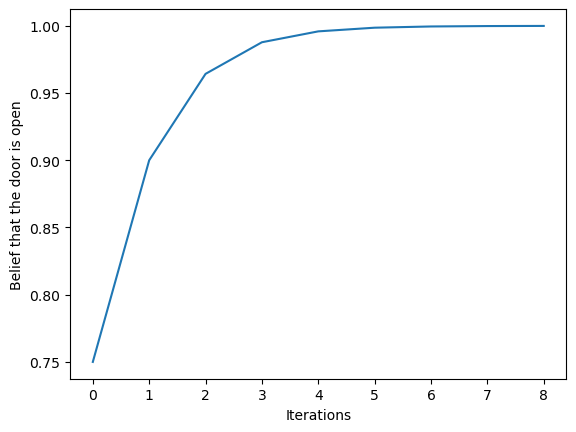

In [8]:
def main():
    action = "do_nothing"
    measurement = "open"
    iteration = 0

    bel_x0_open = 0.5
    bel_x0_closed = 0.5

    iterations = []
    beliefs = []

    while bel_x0_open <= 0.9999:
         print("Action",action)
         print("Measurement",measurement)
         bel_x0_open,bel_x0_closed = bayes_filter(action,measurement,bel_x0_open,bel_x0_closed)
         print("Probability the door is open is ",bel_x0_open)
         print("Probability the door is closed is ",bel_x0_closed)
         print("Iteration",iteration+1,"done\n")
         iterations.append(iteration)
         beliefs.append(bel_x0_open)
         iteration = iteration+1
    
    print("Completed in",iteration,"iterations")

    plt.plot(iterations,beliefs)
    plt.xlabel("Iterations")
    plt.ylabel("Belief that the door is open")
    plt.show()

if __name__ == "__main__":
    main()

**Hence, according to our code output, it takes 9 iterations before the robot is at least 99.99% certain the door is open.**

## Question 2

For answering Question 2, let's modify the main function such that the action is always "open" and the measurement is "open". Further, we iterate the while loop until the robot is atleast 99.99% sure that the door is open. 

Action open
Measurement open
Probability the door is open is  0.9642857142857143
Probability the door is closed is  0.03571428571428572
Iteration 1 done

Action open
Measurement open
Probability the door is open is  0.9976076555023923
Probability the door is closed is  0.002392344497607656
Iteration 2 done

Action open
Measurement open
Probability the door is open is  0.9998404594767072
Probability the door is closed is  0.00015954052329291647
Iteration 3 done

Action open
Measurement open
Probability the door is open is  0.9999893637388585
Probability the door is closed is  1.063626114148355e-05
Iteration 4 done

Completed in 4 iterations


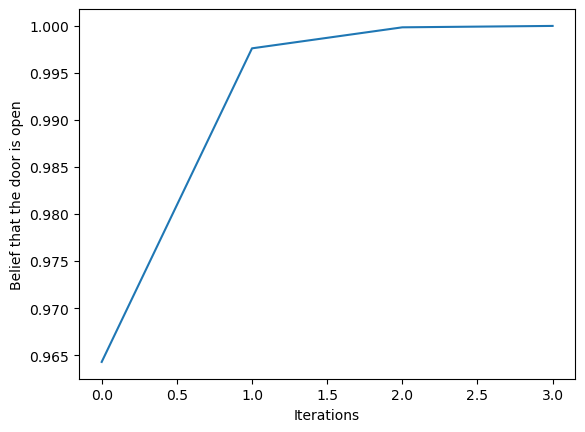

In [9]:
def main():
    action = "open"
    measurement = "open"
    iteration = 0

    bel_x0_open = 0.5
    bel_x0_closed = 0.5

    iterations = []
    beliefs = []

    while bel_x0_open <= 0.9999:
         print("Action",action)
         print("Measurement",measurement)
         bel_x0_open,bel_x0_closed = bayes_filter(action,measurement,bel_x0_open,bel_x0_closed)
         print("Probability the door is open is ",bel_x0_open)
         print("Probability the door is closed is ",bel_x0_closed)
         print("Iteration",iteration+1,"done\n")
         iterations.append(iteration)
         beliefs.append(bel_x0_open)
         iteration = iteration+1

    print("Completed in",iteration,"iterations")

    plt.plot(iterations,beliefs)
    plt.xlabel("Iterations")
    plt.ylabel("Belief that the door is open")
    plt.show()
   
if __name__ == "__main__":
    main()

**Hence, according to our code output, it takes 4 iterations before the robot is at least 99.99% certain the door is open.**

## Question 3

For answering Question 3, for us to conclude that the belief has reached a steady state, we constantly monitor the difference and if it crosses a threshold and remains constant, it has reached a steady state. This can also be verified by the graph which is generated by the code.

Action open
Measurement closed
Probability the door is open is  0.8181818181818182
Probability the door is closed is  0.18181818181818182
Iteration 1 done

Action open
Measurement closed
Probability the door is open is  0.9298245614035088
Probability the door is closed is  0.07017543859649124
Iteration 2 done

Action open
Measurement closed
Probability the door is open is  0.972318339100346
Probability the door is closed is  0.027681660899653984
Iteration 3 done

Action open
Measurement closed
Probability the door is open is  0.9889883000688231
Probability the door is closed is  0.011011699931176877
Iteration 4 done

Action open
Measurement closed
Probability the door is open is  0.9956049993132812
Probability the door is closed is  0.004395000686718858
Iteration 5 done

Action open
Measurement closed
Probability the door is open is  0.9982435436506848
Probability the door is closed is  0.0017564563493152566
Iteration 6 done

Action open
Measurement closed
Probability the door is open 

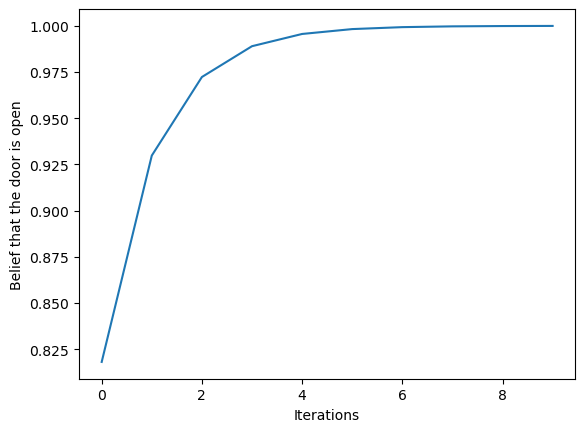

In [10]:
def main():
    action = "open"
    measurement = "closed"
    iteration = 0

    bel_x0_open = 0.5
    bel_x0_closed = 0.5

    min_difference = 0.0001

    max_difference = 50

    iterations = []
    beliefs = []

    while min_difference <= max_difference:
         print("Action",action)
         print("Measurement",measurement)
         old_bel_x0_open = bel_x0_open
         old_bel_x0_closed = bel_x0_closed
         bel_x0_open,bel_x0_closed = bayes_filter(action,measurement,bel_x0_open,bel_x0_closed)
         print("Probability the door is open is ",bel_x0_open)
         print("Probability the door is closed is ",bel_x0_closed)
         max_difference = abs(bel_x0_open-old_bel_x0_open)
         print("Iteration",iteration+1,"done\n")
         iterations.append(iteration)
         beliefs.append(bel_x0_open)
         iteration = iteration+1

    print("Completed in",iteration,"iterations")

    plt.plot(iterations,beliefs)
    plt.xlabel("Iterations")
    plt.ylabel("Belief that the door is open")
    plt.show()
   
if __name__ == "__main__":
    main()

**Our loop is terminated in 10 iterations where it reaches steady state belief (99.99%)**.